<a href="https://colab.research.google.com/github/anthonymalumbe/anthonyml_portfolio/blob/main/Archive/Early_Detection_of_COVID_19_through_Chest_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import subprocess
import tensorflow as tf

def downgrade_tensorflow(desired_version):
    try:
        current_version = tf.__version__
        if current_version == desired_version:
            print(f"TensorFlow is already at version {desired_version}. No downgrade needed.")
        else:
            # Uninstall the current TensorFlow version
            uninstall_command = f"pip uninstall tensorflow -y"
            subprocess.run(uninstall_command, shell=True, check=True)

            # Install the desired TensorFlow version
            install_command = f"pip install tensorflow=={desired_version}"
            subprocess.run(install_command, shell=True, check=True)

            print(f"Successfully downgraded TensorFlow to version {desired_version}")
    except Exception as e:
        print(f"Error: {e}")
#desired_version = "2.9.1"  # Replace with your desired TensorFlow version
#downgrade_tensorflow(desired_version)

!pip uninstall -q tensorflow
!pip install tensorflow==2.9.1
import tensorflow as tf


Proceed (Y/n)? Y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 57.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting un

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import itertools
import zipfile


from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Dense,  Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB7
print(tf.version.VERSION)

import warnings
warnings.filterwarnings("ignore")

2.9.1


Download the COVID-19 Dataset

The create_directories function takes a list of directory paths as input and checks whether each specified path exists. If a path does not exist, it creates a new directory at that location. This function helps ensure that the required directories are available for data storage or other purposes.

Comments:
1. The function includes a summary that explains its purpose, input parameter, and the action it performs.
2. It iterates through the list of directory paths provided in the paths parameter.
3. For each path, it checks whether the directory already exists using os.path.exists.
4. If the directory does not exist (not is_exist), it creates a new directory using os.makedirs.
5. Example usage is provided to demonstrate how to use the function to create directories as needed.

In [ ]:
def create_directories(paths):
    """
    Create directories if they do not exist.

    Parameters:
    - paths: A list of directory paths to be checked and created if they do not exist.

    This function takes a list of directory paths and checks whether each specified path exists.
    If a path does not exist, it creates a new directory at that location.

    Example usage:
    paths_to_create = ["COVID-QU-Ex-Dataset/test", "COVID-QU-Ex-Dataset/train", "COVID-QU-Ex-Dataset/validate"]
    create_directories(paths_to_create)
    """
    for path in paths:
        # Check whether the specified path exists
        is_exist = os.path.exists(path)
        if not is_exist:
            # Create a new directory because it does not exist
            os.makedirs(path)

In [ ]:
    paths_to_create = ["COVID-QU-Ex-Dataset/test", "COVID-QU-Ex-Dataset/train", "COVID-QU-Ex-Dataset/validate"]
    create_directories(paths_to_create)

In [ ]:
# defining Path

checkfileexists = '/covidqu.zip'

# Checking whether the specified path exists
isFile = os.path.isfile(checkfileexists)
if not isFile:
  !kaggle datasets download anasmohammedtahir/covidqu

100% 1.15G/1.15G [00:51<00:00, 28.5MB/s]
100% 1.15G/1.15G [00:51<00:00, 24.2MB/s]


Uzip the COVID-19 Dataset zip file

In [ ]:
!unzip -n -q covidqu.zip  -d "COVID-QU-Ex Dataset/"

List the number of images in the Lung Segementation Directories

In [ ]:
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/validate
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/validate
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/validate

!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/images/*' -d /content/COVID-QU-Ex-Dataset/validate
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Normal/images/*' -d /content/COVID-QU-Ex-Dataset/validate
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images/*' -d /content/COVID-QU-Ex-Dataset/validate

The updated unzip_images function extracts specific image files from a ZIP archive to specified extraction paths. If duplicate filenames are encountered, the function automatically renames them by appending a unique identifier to ensure that each filename is unique within the destination directory.

Comments:
1. The function includes a summary that explains its purpose, input parameters, and the action it performs.
2. It now handles duplicate filenames by appending a unique identifier to each filename, ensuring that extracted files have distinct names within the destination directory.
3.Error handling is in place to catch and print any exceptions that may occur during the extraction process.
4. Example usage is provided to demonstrate how to use the function to unzip images and handle duplicate filenames.

In [ ]:
def unzip_images(zip_path, extract_paths, extensions=[".jpeg", ".jpg", ".png"]):
    """
    Unzip specific image files from a ZIP archive to specified extract paths.

    Parameters:
    - zip_path: The file path to the ZIP archive containing image files.
    - extract_paths: A list of extraction paths for each category of images.
    - extensions: A list of image file extensions to be extracted (default: [".jpeg", ".jpg", ".png"]).

    This function unzips specific image files (filtered by extensions) from a ZIP archive located at
    'zip_path' and extracts them to specified 'extract_paths'. The 'extract_paths' list should match
    the structure of the ZIP archive. If duplicate filenames are encountered, the function will
    automatically rename them by appending a unique identifier.

    Example usage:
    zip_file = "/content/covidqu.zip"
    extraction_paths = [
        "/content/COVID-QU-Ex Dataset/test",
        "/content/COVID-QU-Ex Dataset/train",
        "/content/COVID-QU-Ex Dataset/validate"
    ]
    unzip_images(zip_file, extraction_paths)
    """
    try:
        # Open the ZIP archive for reading
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for ext in extensions:
                # Define patterns to filter files in the ZIP archive
                patterns = [f"*{ext.lower()}", f"*{ext.upper()}"]

                # Loop through extraction paths and patterns
                for extract_path, pattern in zip(extract_paths, patterns):
                    # Extract image files matching the pattern to the specified path
                    for member in zip_ref.infolist():
                        if member.filename.endswith(pattern):
                            # Handle duplicate filenames by appending a unique identifier
                            filename = os.path.basename(member.filename)
                            base, ext = os.path.splitext(filename)
                            counter = 1
                            while os.path.exists(os.path.join(extract_path, filename)):
                                filename = f"{base}_{counter}{ext}"
                                counter += 1

                            # Extract the file with the unique filename
                            extracted_path = os.path.join(extract_path, filename)
                            with open(extracted_path, "wb") as outfile:
                                outfile.write(zip_ref.read(member))
    except Exception as e:
        print(f"Error unzipping images: {e}")

In [ ]:
zip_file = "/content/covidqu.zip"
extraction_paths = [
    "/content/COVID-QU-Ex-Dataset/test/",
    "/content/COVID-QU-Ex-Dataset/train/",
    "/content/COVID-QU-Ex-Dataset/validate/"
]
unzip_images(zip_file, extraction_paths)

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect(
        tpu="local")
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except tf.errors.NotFoundError:
    print("Not running on TPU")
    strategy = tf.distribute.MirroredStrategy()

print("REPLICAS:", strategy.num_replicas_in_sync)

Not running on TPU
REPLICAS: 1


Configuration

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

NUM_CLASS = 3
CLASSES = ['COVID-19', 'Non-COVID', 'Normal']

IMAGE_SIZE = [224, 224]
LR = 1e-5
EPOCHS = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

TRAINING_PATH = 'COVID-QU-Ex-Dataset/train'
TESTING_PATH = 'COVID-QU-Ex-Dataset/test'
VALIDATION_PATH = 'COVID-QU-Ex-Dataset/validate'

Utilities

Create a function that takes a batch of data with images and one-hot encoded labels, converts the images and decodes the labels into class indices, and returns them as NumPy arrays

In [ ]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data                   #unpack the input data into two separate variables, images and labels
    numpy_images = images.numpy()           #convert the images tensor (or array) into a NumPy array and stores it in the variable numpy_images
    numpy_labels = labels.numpy()           #convert the labels tensor (or array) into a NumPy array and stores it in the variable numpy_labels
    return numpy_images, np.argmax(numpy_labels, axis=1) # returns a tuple containing two elements:
                                                         # 1. numpy_images: The NumPy array containing image data.
                                                         # 2. np.argmax(numpy_labels, axis=1): This part computes the argmax along axis=1 of numpy_labels,
                                                         #    which essentially converts one-hot encoded labels into their corresponding class indices.
                                                         #    The result is a NumPy array of class indices for each sample in the batch.

In this function:

It first checks if correct_label is None, which indicates that the label is unlabeled. If it's the case, it returns the class name (from CLASSES) for the given label and True to indicate that no correction was needed.

If correct_label is not None, it compares label with correct_label to determine whether the label is correct or incorrect.

Depending on whether the label is correct or incorrect, it constructs a title string with a specific format:

If correct, it adds "[OK]" to the class name. If incorrect, it adds "[NO] → Correct Class Name" to the class name. Finally, it returns the constructed title and a boolean correct indicating whether the label is correct.

In [ ]:
def title_from_label_and_target(label, correct_label):
    # Check if correct_label is None (i.e., unlabeled).
    if correct_label is None:
        # Return the class name (from CLASSES) for 'label' and a boolean 'True' to indicate no correction needed.
        return CLASSES[label], True

    # Check if 'label' matches 'correct_label'.
    correct = (label == correct_label)

    # Construct the title string based on correctness.
    # If correct, format as: "Class Name [OK]".
    # If incorrect, format as: "Class Name [NO] → Correct Class Name".
    title = "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO',
                                u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else '')

    # Return the constructed title and the correctness boolean.
    return title, correct


This function uses the matplotlib.pyplot library to create a subplot in a grid layout specified by the subplot parameter.

It turns off the axis (ticks and labels) for the current subplot, making the image the primary focus.

It displays the provided image in the current subplot using plt.imshow().

It customizes the title display:

If the title is not empty (i.e., len(title) > 0), it sets the title with a specified fontsize and color. If red is True, it uses a red color and adjusts the fontsize to make it smaller (int(titlesize/1.2)). It also centers the title vertically ('verticalalignment': 'center') and adds padding to the title (pad=int(titlesize/1.5)). Finally, it returns an updated tuple (subplot[0], subplot[1], subplot[2] + 1) to indicate the next subplot position in the grid layout. This is helpful for creating multiple subplots in a row.

In [ ]:
def display_one(image, title, subplot, red=False, titlesize=16):
    # Create a subplot in the specified grid layout.
    plt.subplot(*subplot)

    # Turn off the axis (i.e., no axis ticks and labels).
    plt.axis('off')

    # Display the image in the current subplot.
    plt.imshow(image)

    # Customize the title if it's not empty.
    if len(title) > 0:
        # Set the title with specified fontsize and color.
        # If 'red' is True, use a red color and adjust the fontsize.
        plt.title(
            title,
            fontsize=int(titlesize) if not red else int(titlesize/1.2),
            color='red' if red else 'black',
            fontdict={'verticalalignment': 'center'},  # Center-align the title vertically.
            pad=int(titlesize/1.5)  # Add padding to the title.
        )

    # Return updated subplot information.
    return (subplot[0], subplot[1], subplot[2] + 1)


This function begins by extracting the images and labels from the provided databatch using the batch_to_numpy_images_and_labels function.

1. It calculates the number of rows and columns for the subplot grid based on the number of images in the batch.
2. It sets the size of the figure and spacing between subplots.
3. It iterates through each image and its corresponding label, updating the title and correctness flag based on predictions if provided.
4. It calculates a dynamic title size based on the figure size and spacing.
5. It uses the display_one function to display each image with its title in a subplot.
6. It adjusts the layout and spacing of subplots using plt.tight_layout() and plt.subplots_adjust().
7. Finally, it displays the entire figure with subplots using plt.show().

In [ ]:

def display_batch(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """

    # Extract images and labels from the batch using batch_to_numpy_images_and_labels function
    images, labels = batch_to_numpy_images_and_labels(databatch)

    # Calculate the number of rows and columns for the subplot grid
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Define the size of the figure and the spacing between subplots
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot = (rows, cols, 1)

    # Adjust the figure size based on whether rows or columns are smaller
    if rows < cols:
        plt.figure(figsize=(FIGSIZE, FIGSIZE / cols * rows))
    else:
        plt.figure(figsize=(FIGSIZE / rows * cols, FIGSIZE))

    # Display each image with its corresponding title
    for i, (image, label) in enumerate(zip(images[:rows * cols], labels[:rows * cols])):
        title = '' if label is None else CLASSES[label]
        correct = True

        # If predictions are provided, update the title and correctness flag
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)

        # Calculate a dynamic title size based on the figure size and spacing
        dynamic_titlesize = FIGSIZE * SPACING / max(rows, cols) * 40 + 3

        # Display the image and title in the current subplot
        subplot = display_one(image, title, subplot, not correct, titlesize=dynamic_titlesize)

    # Adjust the layout and spacing of subplots
    plt.tight_layout()

    # If there are no labels or predictions, remove spacing between subplots
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)

    # Show the entire figure with subplots
    plt.show()

This function is designed to visualize the training history of a machine learning model, typically used in deep learning tasks like neural networks. It takes a history object as input, which typically contains training and validation loss, as well as training and validation accuracy values recorded during the model training process. The function performs the following steps:

1. Creates a new figure for the plot.
2. Sets up a subplot with one row and two columns, creating two side-by-side subplots for displaying loss and accuracy.
3. In the first subplot (ax[0]), it plots the training loss in blue and the validation loss in red from the history object. Legends are added to indicate which line corresponds to training and validation loss.
4. In the second subplot (ax[1]), it plots the training accuracy in blue and the validation accuracy in red from the history object. Legends are added to indicate which line corresponds to training and validation accuracy.
5. The layout of the subplots is adjusted to prevent overlapping.
6. Finally, the function displays the plot, allowing you to visually assess the training and validation performance of your machine learning model over epochs.

In [ ]:

def display_history(history):
    # Create a new figure
    plt.figure()

    # Create subplots with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))

    # Plot training loss in the first subplot (ax[0])
    ax[0].plot(history.history['loss'], color='b', label="training_loss")
    # Plot validation loss in the same subplot
    ax[0].plot(history.history['val_loss'], color='r', label="validation_loss")
    # Add a legend for the first subplot
    legend = ax[0].legend(loc='best', shadow=True)

    # Plot training accuracy in the second subplot (ax[1])
    ax[1].plot(history.history['accuracy'], color='b', label="training_accuracy")
    # Plot validation accuracy in the same subplot
    ax[1].plot(history.history['val_accuracy'], color='r', label="validation_accuracy")
    # Add a legend for the second subplot
    legend = ax[1].legend(loc='best', shadow=True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Display the plot
    plt.show()

In [ ]:
def display_confusion_matrix(
        cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.

    Parameters:
    - cm: Confusion matrix data to be displayed.
    - classes: List of class labels (e.g., ['Class A', 'Class B']).
    - normalize: If True, normalize the confusion matrix.
    - title: Title for the confusion matrix plot.
    - cmap: Colormap for the plot.

    If normalize is set to True, the confusion matrix values will be normalized
    to show proportions. Otherwise, the raw counts will be displayed.

    The function generates a visualization of the confusion matrix, providing a
    useful tool for assessing the performance of a classification model. It can
    help in understanding how well the model predicts true and false positives
    and negatives for each class.

    Note:
    - When normalize is False, the matrix displays raw counts.
    - When normalize is True, the matrix displays proportions.

    The plot includes labels for the true and predicted labels along with a color
    scale to indicate the magnitude of values in the confusion matrix cells.

    Example usage:
    display_confusion_matrix(confusion_matrix, ['Class A', 'Class B'],
                            normalize=True, title='Normalized Confusion Matrix')
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Create a new figure for the plot
    plt.figure()

    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Define tick marks for class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Format the cell values in the confusion matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Adjust the layout for better display
    plt.tight_layout()

    # Label the axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Show the plot
    plt.show()


DataSet

This function is used to create a structured dataset in the form of a Pandas DataFrame from a directory containing labeled data. It assumes that the data is organized in subdirectories, with each subdirectory representing a class and containing image files. The function collects the file paths and corresponding class labels and returns them in a DataFrame. The provided comments describe the purpose of the function, its parameters, return value, and example usage.

In [ ]:
def create_dataframe(data_dir):
    """
    This function creates a Pandas DataFrame from a directory containing labeled data.

    Parameters:
    - data_dir (str): The path to the directory containing subdirectories for each class,
                      with image files inside.

    Returns:
    - pd.DataFrame: A Pandas DataFrame with two columns, 'filename' and 'label',
                    where 'filename' contains the file paths to images, and 'label'
                    contains the corresponding class labels.

    Example usage:
    train_df = create_dataframe(TRAINING_PATH)
    val_df = create_dataframe(VALIDATION_PATH)
    test_df = create_dataframe(TESTING_PATH)
    """
    # Initialize empty lists to store filenames and labels
    filenames, labels = [], []

    # Iterate through subdirectories (representing classes) in the data_dir
    for fold in os.listdir(data_dir):
        path = os.path.join(data_dir, fold, 'images')

        # Create a list of file paths for images in the current class
        filelist = [os.path.join(path, filename) for filename in os.listdir(path)]

        # Extend the filenames list with the current class's file paths
        filenames.extend(filelist)

        # Extend the labels list with the current class's label (class name)
        labels.extend([fold] * len(filelist))

    # Create a Pandas DataFrame from the collected filenames and labels
    return pd.DataFrame({
        'filename': filenames,
        'label': labels
    })

# Example usage:
# Create DataFrames for training, validation, and testing datasets
train_df = create_dataframe(TRAINING_PATH)
val_df = create_dataframe(VALIDATION_PATH)
test_df = create_dataframe(TESTING_PATH)


This code calculates and prints various statistics related to a dataset, which is likely used for training and evaluating a machine learning model. It calculates the number of images in the training, validation, and test datasets, as well as the number of steps per epoch for training, validation, and testing. Additionally, it prints the class distribution for each dataset, showing the number of samples for each class.

Comments:
1. The code calculates the number of training, validation, and test images by counting the rows in the respective dataframes.
2. It calculates the number of steps per epoch for training, validation, and testing by dividing the number of images by the batch size, ensuring that there are enough steps to cover all data points.
3. The code then prints information about the dataset sizes and class distributions for each dataset. This can be helpful for understanding the dataset's composition and verifying that it is properly balanced for training a machine learning model.
4. The CLASSES variable is assumed to be defined elsewhere in the code, likely containing the class labels used in the dataset.

In [ ]:
# Calculate the number of images in the training, validation, and test datasets
NUM_TRAINING_IMAGES = len(train_df.index)
NUM_VALIDATION_IMAGES = len(val_df)
NUM_TEST_IMAGES = len(test_df)

# Calculate the number of steps per epoch for training, validation, and testing
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE
VALIDATION_STEPS = -(- NUM_VALIDATION_IMAGES // BATCH_SIZE)
TEST_STEPS = -(-NUM_TEST_IMAGES // BATCH_SIZE)

# Print information about the dataset sizes and class distributions
print("Training images:", NUM_TRAINING_IMAGES)
train_label_counts = train_df['label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in train_label_counts.items()]))
print()

print("Validation images:", NUM_VALIDATION_IMAGES)
val_label_counts = val_df['label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in val_label_counts.items()]))
print()

print("Test images:", NUM_TEST_IMAGES)
test_label_counts = test_df['label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in test_label_counts.items()]))


Training images: 3728
COVID-19: 1864, Normal: 932, Non-COVID: 932

Validation images: 932
COVID-19: 466, Normal: 233, Non-COVID: 233

Test images: 1166
COVID-19: 583, Non-COVID: 292, Normal: 291


You can use this analyze_dataset function by passing your DataFrames, batch size (BATCH_SIZE), and class labels (CLASSES) as arguments. It will calculate and print the dataset statistics and class distributions, making it easy to analyze your dataset in a structured way.

In [ ]:
def analyze_dataset(train_df, val_df, test_df, BATCH_SIZE, CLASSES):
    """
    Analyzes the dataset and prints information about dataset sizes and class distributions.

    Parameters:
    - train_df: DataFrame containing training data.
    - val_df: DataFrame containing validation data.
    - test_df: DataFrame containing test data.
    - BATCH_SIZE: Batch size used for training.
    - CLASSES: List of class labels.

    This function calculates the number of images in the training, validation, and test datasets,
    as well as the number of steps per epoch for training, validation, and testing. It then prints
    information about the dataset sizes and class distributions for each dataset.
    """

    # Calculate the number of images in the training, validation, and test datasets
    NUM_TRAINING_IMAGES = len(train_df.index)
    NUM_VALIDATION_IMAGES = len(val_df)
    NUM_TEST_IMAGES = len(test_df)

    # Calculate the number of steps per epoch for training, validation, and testing
    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE
    VALIDATION_STEPS = -(- NUM_VALIDATION_IMAGES // BATCH_SIZE)
    TEST_STEPS = -(-NUM_TEST_IMAGES // BATCH_SIZE)

    # Print information about the dataset sizes and class distributions
    print("Training images:", NUM_TRAINING_IMAGES)
    train_label_counts = train_df['label'].value_counts().rename(
        index=dict(enumerate(CLASSES)))
    print(", ".join([f"{label}: {count}" for label, count in train_label_counts.items()]))
    print()

    print("Validation images:", NUM_VALIDATION_IMAGES)
    val_label_counts = val_df['label'].value_counts().rename(
        index=dict(enumerate(CLASSES)))
    print(", ".join([f"{label}: {count}" for label, count in val_label_counts.items()]))
    print()

    print("Test images:", NUM_TEST_IMAGES)
    test_label_counts = test_df['label'].value_counts().rename(
        index=dict(enumerate(CLASSES)))
    print(", ".join([f"{label}: {count}" for label, count in test_label_counts.items()]))


Data Augmentation

The data_augment function takes an input image and its corresponding label as parameters and applies random data augmentation techniques to the image. Specifically, it performs random horizontal flipping (left-right), random brightness adjustment, and random contrast adjustment. The original label remains unchanged. Data augmentation is commonly used in deep learning to enhance the variety of training data, which can improve the model's ability to generalize to new, unseen data.

Comments:
1. The function includes a brief description of its purpose, input parameters, and return values.
2. It uses TensorFlow (tf) functions to perform data augmentation operations on the input image.
3. Horizontal flipping is applied with random probability, so each call to this function may or may not flip the image horizontally.
4. Random brightness adjustment is applied with a factor in the range [-0.1, 0.1], which can increase or decrease image brightness.
5. Random contrast adjustment is applied with a factor in the range [0.8, 1.2], which can alter the image's contrast.
6. The original label is not modified and is returned alongside the augmented image.
7. Example usage is provided to demonstrate how to use the function to augment an image and its corresponding label.






In [ ]:
def data_augment(image, label):
    """
    Apply random data augmentation to an input image.

    Parameters:
    - image: The input image to be augmented.
    - label: The corresponding label for the input image.

    Returns:
    - Augmented image: The image with random augmentations applied.
    - label: The unaltered label.

    This function applies random horizontal flipping, random brightness adjustment, and
    random contrast adjustment to the input image. Data augmentation is a common technique
    used in deep learning to increase the diversity of training data and improve model
    generalization.

    Example usage:
    augmented_image, label = data_augment(input_image, input_label)
    """
    # Apply random horizontal flipping (left-right)
    image = tf.image.random_flip_left_right(image)

    # Apply random brightness adjustment
    image = tf.image.random_brightness(image, 0.1)  # Brightness factor: [-0.1, 0.1]

    # Apply random contrast adjustment
    image = tf.image.random_contrast(image, 0.8, 1.2)  # Contrast range: [0.8, 1.2]

    # Return the augmented image and unaltered label
    return image, label


The get_label function takes a class label as input and converts it into a one-hot encoded representation. One-hot encoding is a technique used in machine learning, particularly for multi-class classification tasks, where each class is represented as a binary vector with one element set to 1 to indicate the class and all other elements set to 0.

Comments:
1. The function provides a brief summary of its purpose, input parameter, and return value.
2. It checks whether the input label matches any of the classes listed in the CLASSES variable, assuming that CLASSES is defined elsewhere in the code.
3. The function uses TensorFlow (tf) to perform the conversion.
4. The one-hot encoded label is represented as integers (0 for False, 1 for True) and is returned as the output.
5. Example usage is provided to demonstrate how to use the function to convert a class label into a one-hot encoded format

In [ ]:
def get_label(label):
    """
    Convert a class label to a one-hot encoded format.

    Parameters:
    - label: The class label to be converted.

    Returns:
    - onehot_label: The one-hot encoded representation of the class label.

    This function takes a class label and converts it into a one-hot encoded format.
    A one-hot encoding represents each class as a binary vector with one element set to 1
    (indicating the class) and all other elements set to 0. This is commonly used in
    machine learning for multi-class classification tasks.

    Example usage:
    onehot_label = get_label("Class B")
    """
    # Check if the label matches any class in CLASSES
    onehot = label == CLASSES

    # Convert the boolean array to integers (0 for False, 1 for True)
    onehot_label = tf.cast(onehot, tf.int32)

    # Return the one-hot encoded label
    return onehot_label


The decode_image function takes a file path as input and performs several image processing operations on it. It reads the image from the file, decodes it (assuming it's in PNG format), converts it to a floating-point representation, and resizes it to a predefined image size. This function is commonly used for preparing image data for machine learning models.

Comments:
1. The function provides a concise summary of its purpose, input parameter, and return value.
2. It uses TensorFlow (tf) functions to perform image operations, making it suitable for deep learning tasks.
3. The assumptions about the image format (PNG with 3 color channels) are mentioned in the comments.
4. The IMAGE_SIZE variable is assumed to be defined elsewhere in the code, specifying the target size for the image.
5. The preprocessed image is returned as a TensorFlow tensor, ready to be used in machine learning models.
6. Example usage is provided to demonstrate how to use the function to decode and preprocess an image from a file path.






In [ ]:
def decode_image(path):
    """
    Decode and preprocess an image from a file path.

    Parameters:
    - path: The file path of the image to be decoded.

    Returns:
    - image: The decoded and preprocessed image as a TensorFlow tensor.

    This function reads an image from the specified file path, decodes it (assuming it's in PNG format),
    converts it to a floating-point representation, and resizes it to a predefined image size.
    It is commonly used for preparing image data for machine learning models.

    Example usage:
    decoded_image = decode_image("image.png")
    """
    # Read the image from the file path
    image = tf.io.read_file(path)

    # Decode the image (assuming PNG format with 3 color channels)
    image = tf.image.decode_png(image, channels=3)

    # Convert the image to the floating-point data type (tf.float32)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image to the predefined IMAGE_SIZE
    image = tf.image.resize(image, IMAGE_SIZE)  # IMAGE_SIZE should be defined elsewhere

    # Return the preprocessed image as a TensorFlow tensor
    return image


The preprocess_path function takes an image file path (path) and its corresponding class label (label) as input and performs two preprocessing steps: decoding and preprocessing the image using the decode_image function, and converting the label to one-hot encoding using the get_label function. The function returns both the preprocessed image and label as a tuple.

Comments:
1. The function provides a clear summary of its purpose, input parameters, and return value.
2. It leverages the previously defined decode_image and get_label functions to perform image and label preprocessing.
3. The preprocessed image is obtained by calling decode_image(path), which handles image decoding, data type conversion, and resizing.
4. The preprocessed label is obtained by calling get_label(label), which converts the class label to one-hot encoding.
5. The result is returned as a tuple containing the preprocessed image and label, making it ready for use in machine learning models.
6.Example usage is provided to demonstrate how to use the function to preprocess an image file path and its associated label.





In [ ]:
def preprocess_path(path, label):
    """
    Preprocess an image file path and its corresponding label.

    Parameters:
    - path: The file path of the image to be preprocessed.
    - label: The class label associated with the image.

    Returns:
    - Preprocessed image: The image, decoded and preprocessed.
    - Preprocessed label: The label, converted to one-hot encoding.

    This function combines the preprocessing steps for an image file path and its corresponding label.
    It uses the `decode_image` function to decode and preprocess the image, and the `get_label` function
    to convert the class label to one-hot encoding.

    Example usage:
    preprocessed_image, preprocessed_label = preprocess_path("image.png", "Class A")
    """
    # Decode and preprocess the image using the decode_image function
    preprocessed_image = decode_image(path)

    # Convert the label to one-hot encoding using the get_label function
    preprocessed_label = get_label(label)

    # Return the preprocessed image and label as a tuple
    return preprocessed_image, preprocessed_label


The load_dataset function loads and preprocesses a dataset from a DataFrame containing file paths and labels. It provides an option to control whether the order of data is maintained (ordered=True) or if order is disabled to increase loading speed (ordered=False). The dataset is mapped to the preprocess_path function for image and label preprocessing.

Comments:
1. The function offers a clear summary of its purpose, input parameters, and return value.
2. It creates options (ignore_order) to control the order of data in the dataset, allowing for both ordered and unordered data loading.
3. The dataset is created using tf.data.Dataset.from_tensor_slices with file paths and labels from the DataFrame.
4. The ignore_order options are applied to the dataset to control the order of data processing.
5. The preprocess_path function is mapped to the dataset to preprocess images and labels, and it can be executed in parallel (num_parallel_calls) for efficiency.
6. The resulting dataset is returned and can be used for training machine learning models.
7. Example usage is provided to demonstrate how to use the function to load and preprocess a dataset from a DataFrame.

In [ ]:
def load_dataset(df=pd.DataFrame(), ordered=False):
    """
    Load and preprocess a dataset from a DataFrame.

    Parameters:
    - df: A DataFrame containing file paths and labels.
    - ordered: If True, maintain the order of data; if False, increase loading speed.

    Returns:
    - dataset: A TensorFlow dataset containing preprocessed image and label pairs.

    This function loads a dataset from a DataFrame containing file paths and labels.
    It provides an option to maintain the order of data (if ordered=True) or prioritize loading
    speed by disabling order (if ordered=False). The dataset is mapped to the `preprocess_path`
    function for image and label preprocessing.

    Example usage:
    dataset = load_dataset(train_df, ordered=True)
    """
    # Create options for the dataset to control order
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False  # Disable order to increase speed

    # Create a dataset from file paths and labels in the DataFrame
    dataset = tf.data.Dataset.from_tensor_slices(
        (df['filename'].values, df['label'].values))

    # Apply options to control order (or lack thereof)
    dataset = dataset.with_options(ignore_order)

    # Map the preprocess_path function for image and label preprocessing
    dataset = dataset.map(preprocess_path, num_parallel_calls=AUTOTUNE)  # AUTOTUNE assumed defined

    # Return the preprocessed dataset
    return dataset


The get_train_dataset function is responsible for creating and preprocessing the training dataset. It loads the training data using the load_dataset function, optionally applies data augmentation, repeats the dataset indefinitely for multiple epochs, shuffles it for randomness, and batches it for training. Data augmentation is an optional step to increase the diversity of training data.

Comments:
1. The function provides a clear summary of its purpose, input parameter, and return value.
2. It loads the training dataset using the load_dataset function, which is assumed to be defined elsewhere.
3. If the augment parameter is set to True, data augmentation is applied to the dataset using the data_augment function.
4. The dataset is repeated indefinitely, which is a common practice for training deep learning models over multiple epochs.
5. Shuffling the dataset ensures that each batch contains randomly ordered samples.
6. Batching is applied to create batches of data for training.
7. Optional data augmentation can be enabled or disabled based on the augment parameter.
8. Example usage is provided to demonstrate how to use the function to create and preprocess the training dataset.

In [ ]:
def get_train_dataset(augment=False):
    """
    Create and preprocess the training dataset.

    Parameters:
    - augment: If True, apply data augmentation to the training dataset.

    Returns:
    - dataset: A TensorFlow dataset containing preprocessed training data.

    This function loads the training dataset using the `load_dataset` function and provides an option
    to apply data augmentation if `augment` is set to True. The dataset is repeated indefinitely,
    shuffled for randomness, and batched for training. Optionally, data augmentation can be applied
    to the images to increase training data diversity.

    Example usage:
    train_dataset = get_train_dataset(augment=True)
    """
    # Load the training dataset
    dataset = load_dataset(train_df)

    # Apply data augmentation if specified
    if augment:
        dataset = dataset.map(data_augment, num_parallel_calls=AUTOTUNE)

    # Repeat the dataset indefinitely
    dataset = dataset.repeat()

    # Shuffle the dataset for randomness
    dataset = dataset.shuffle(BATCH_SIZE * 100)

    # Batch the dataset for training
    dataset = dataset.batch(BATCH_SIZE)

    #if (augment):
    #     dataset = dataset.map(lambda x, y: (data_augment(x), y))
    #dataset = dataset.prefetch(AUTOTUNE)

    # Return the preprocessed training dataset
    return dataset


The get_validation_dataset function is responsible for creating and preprocessing the validation dataset. It loads the validation data using the load_dataset function, allowing for the option to maintain data order or prioritize loading speed. The dataset is batched, cached for efficiency, and prefetched to improve data loading performance during training.

Comments:
1. The function provides a clear summary of its purpose, input parameter, and return value.
2. It loads and preprocesses the validation dataset using the load_dataset function, which is assumed to be defined elsewhere.
3. The ordered parameter allows control over whether data order is maintained or not.
4. Batching is applied to create validation data batches for evaluation during training.
5. Caching the dataset improves data loading efficiency by storing it in memory after the first pass.
6. Prefetching data reduces latency during training by asynchronously loading data while the model is training on the previous batch.
7. Example usage is provided to demonstrate how to use the function to create and preprocess the validation dataset.

In [ ]:
def get_validation_dataset(ordered=False):
    """
    Create and preprocess the validation dataset.

    Parameters:
    - ordered: If True, maintain the order of validation data; if False, prioritize loading speed.

    Returns:
    - dataset: A TensorFlow dataset containing preprocessed validation data.

    This function loads and preprocesses the validation dataset using the `load_dataset` function.
    It provides an option to maintain the order of data (if ordered=True) or prioritize loading speed
    by disabling order (if ordered=False). The dataset is batched, cached for efficiency, and prefetched
    for improved data loading performance.

    Example usage:
    val_dataset = get_validation_dataset(ordered=True)
    """
    # Load and preprocess the validation dataset
    dataset = load_dataset(val_df, ordered=ordered)

    # Batch the dataset for validation
    dataset = dataset.batch(BATCH_SIZE)

    # Cache the dataset for improved performance
    dataset = dataset.cache()

    # Prefetch data to reduce latency during training
    dataset = dataset.prefetch(AUTOTUNE)

    # Return the preprocessed validation dataset
    return dataset


The get_test_dataset function is responsible for creating and preprocessing the test dataset. It loads the test data using the load_dataset function, with an option to maintain data order or prioritize loading speed. The dataset is batched and prefetched to optimize data loading performance during testing.

Comments:
1. The function provides a clear summary of its purpose, input parameter, and return value.
2. It loads and preprocesses the test dataset using the load_dataset function, which is assumed to be defined elsewhere.
3. The ordered parameter allows control over whether data order is maintained or not.
4. Batching is applied to create test data batches for evaluation.
5. Prefetching data reduces latency during testing by asynchronously loading data while the model is processing previous data.
6. Example usage is provided to demonstrate how to use the function to create and preprocess the test dataset.

In [ ]:
def get_test_dataset(ordered=False):
    """
    Create and preprocess the test dataset.

    Parameters:
    - ordered: If True, maintain the order of test data; if False, prioritize loading speed.

    Returns:
    - dataset: A TensorFlow dataset containing preprocessed test data.

    This function loads and preprocesses the test dataset using the `load_dataset` function.
    It provides an option to maintain the order of data (if ordered=True) or prioritize loading speed
    by disabling order (if ordered=False). The dataset is batched and prefetched to optimize
    data loading performance during testing.

    Example usage:
    test_dataset = get_test_dataset(ordered=True)
    """
    # Load and preprocess the test dataset
    dataset = load_dataset(test_df, ordered=ordered)

    # Batch the dataset for testing
    dataset = dataset.batch(BATCH_SIZE)

    # Prefetch data to reduce latency during testing
    dataset = dataset.prefetch(AUTOTUNE)

    # Return the preprocessed test dataset
    return dataset


Dataset visualisations

In [ ]:
training_dataset = get_train_dataset()
training_dataset = training_dataset.unbatch().batch(16)
train_batch = iter(training_dataset)

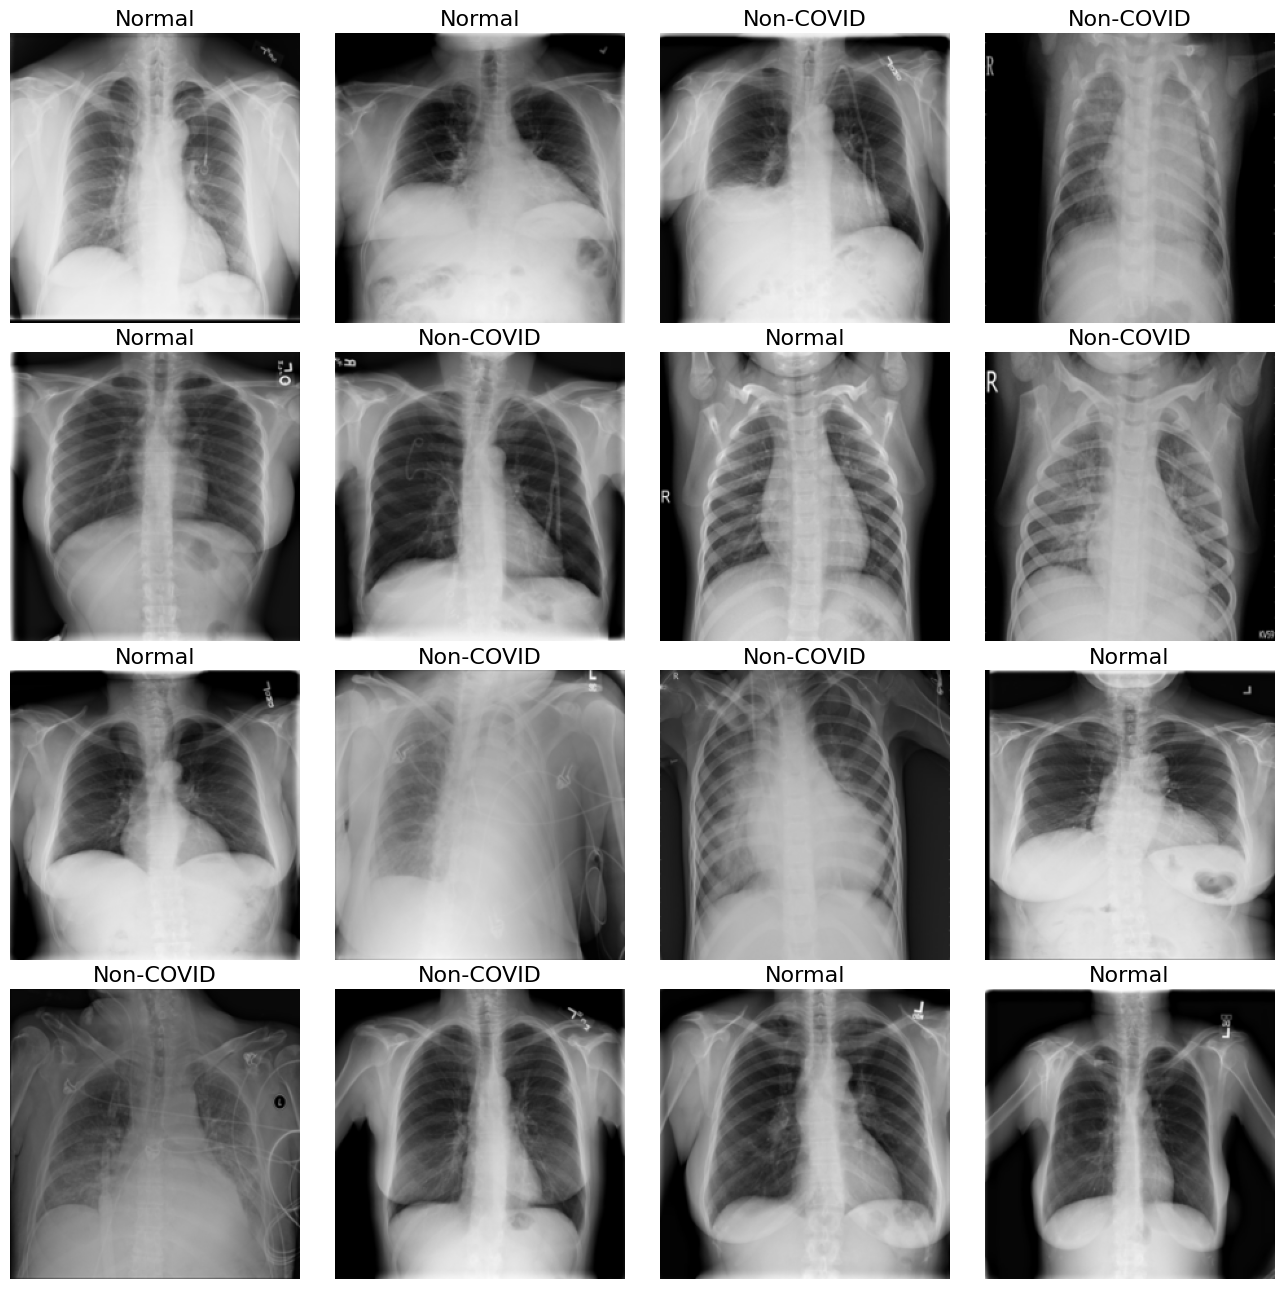

In [ ]:
# run this cell again for another randomized set of training images
display_batch(next(train_batch))

In [ ]:
print("Training data shapes:")
for image, label in get_train_dataset().take(1):
    print(image.numpy().shape, label.numpy().shape)

print("Validation data shapes:")
for image, label in get_train_dataset().take(1):
    print(image.numpy().shape, label.numpy().shape)

print("Test data shapes:")
for image, label in get_test_dataset().take(1):
    print(image.numpy().shape, label.numpy().shape)

Training data shapes:
(16, 224, 224, 3) (16, 3)
Validation data shapes:
(16, 224, 224, 3) (16, 3)
Test data shapes:
(16, 224, 224, 3) (16, 3)


Create a Model

In [ ]:
%%time
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'effb7_model.h5',                 # File to save the model weights
    monitor='val_precision',           # Monitor validation accuracy
    verbose=1,                        # Verbosity level (0: no messages, 1: progress bar, 2: one line per epoch)
    save_best_only=True,              # Save only the best model based on the monitored metric
    save_weights_only=True,           # Save only the model weights, not the whole model
    mode='max'                        # Mode to determine the best model (max: maximize the monitored metric)
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",               # Monitor validation loss
    patience=12,                      # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True         # Restore the model's weights to the best epoch
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",               # Monitor validation loss
    factor=0.2,                       # Reduce learning rate by a factor of 0.2
    patience=3,                       # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7                       # Minimum learning rate
)

CPU times: user 101 µs, sys: 0 ns, total: 101 µs
Wall time: 106 µs


In [ ]:
with strategy.scope():

      # Create the base EfficientNetB7 model with pre-trained weights
      base_model = EfficientNetB7(
          include_top=False,         # Exclude the top classification layer
          weights='imagenet',        # Pre-trained weights on ImageNet
          input_shape=(224, 224, 3)  # Input shape suitable for your X-ray images
      )
      ## Freeze the layers of the base model (optional, you can experiment with this)
      #for layer in base_model.layers:
      #    layer.trainable = True
      # Unfreeze some of the layers (e.g., last few blocks)
      for layer in base_model.layers[-30:]:
          layer.trainable = True

      # Create a custom head for the model
      x = GlobalAveragePooling2D()(base_model.output)       # Global Average pooling layer
      x = Dense(256, activation='relu')(x)                  # Dense layer with ReLU activation
      x = Dropout(0.5)(x)                                   # Dropout layer with a dropout rate of 50%
      x = Flatten()(x)                                      # Flatten layer
      output = Dense(NUM_CLASS, activation='softmax')(x)  # Output layer

      # Create the custom model by combining the base model and custom head
      model = Model(inputs=base_model.input, outputs=output)

      # Compile the model
      model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision()]
      )

      # Print a summary of the model architecture
      model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

Train The Model

In [ ]:
# Train the model with ModelCheckpoint, ReduceLROnPlateau, and EarlyStopping callbacks
history = model.fit(
    get_train_dataset(augment=True),
    steps_per_epoch=STEPS_PER_EPOCH,
    #epochs=EPOCHS,
    epochs=5,
    validation_data=get_validation_dataset(),
    validation_steps=VALIDATION_STEPS,
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# Save the model after training
model.save('effb7_model.h5')

Epoch 1/5
233/233 [==============================] - ETA: 0s - loss: 0.6089 - accuracy: 0.7672 - precision_1: 0.8060

233/233 [==============================] - 268s 903ms/step - loss: 0.6089 - accuracy: 0.7672 - precision_1: 0.8060 - val_loss: 2.5014 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - lr: 0.0010
Epoch 2/5
233/233 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.8492 - precision_1: 0.8716

233/233 [==============================] - 116s 494ms/step - loss: 0.4021 - accuracy: 0.8492 - precision_1: 0.8716 - val_loss: 2.1351 - val_accuracy: 0.2511 - val_precision_1: 0.2511 - lr: 0.0010
Epoch 3/5
233/233 [==============================] - ETA: 0s - loss: 0.3259 - accuracy: 0.8780 - precision_1: 0.8935

233/233 [==============================] - 111s 476ms/step - loss: 0.3259 - accuracy: 0.8780 - precision_1: 0.8935 - val_loss: 2.1810 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - lr: 0.0010
Epoch 4/5
233/233 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.8898 - precision_1: 0.9000

233/233 [==============================] - 111s 477ms/step - loss: 0.2863 - accuracy: 0.8898 - precision_1: 0.9000 - val_loss: 2.2172 - val_accuracy: 0.2521 - val_precision_1: 0.2483 - lr: 0.0010
Epoch 5/5
233/233 [==============================] - ETA: 0s - loss: 0.3059 - accuracy: 0.8916 - precision_1: 0.9034

233/233 [==============================] - 111s 479ms/step - loss: 0.3059 - accuracy: 0.8916 - precision_1: 0.9034 - val_loss: 2.5802 - val_accuracy: 0.3401 - val_precision_1: 0.3469 - lr: 0.0010


Evaluate The Model

<Figure size 640x480 with 0 Axes>

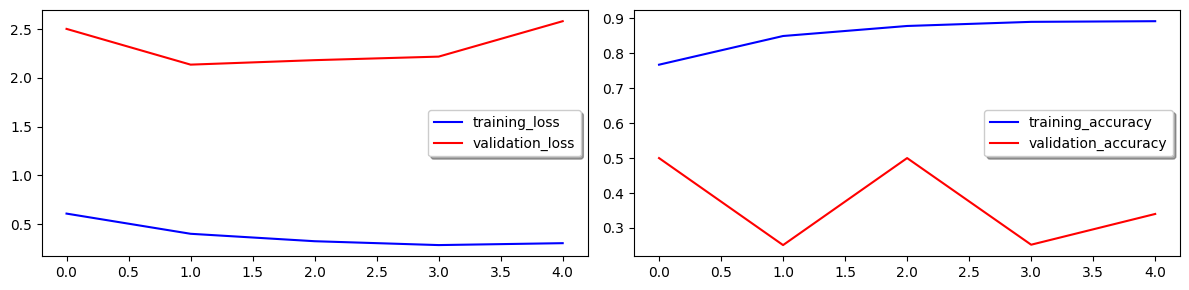

In [ ]:
# Display training history (assuming you have a display_history function)
display_history(history)

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('effb7_model.h5')

In [ ]:
# Get the validation dataset
val_dataset = get_validation_dataset(ordered=True)

# Evaluate the model on the validation dataset
results = model.evaluate(
    val_dataset, batch_size=BATCH_SIZE, steps=VALIDATION_STEPS)

# Print the test loss and test accuracy
print('Test loss: {:4f}'.format(results[0]))
print('Test accuracy: {:4f}'.format(results[1]))

59/59 [==============================] - 10s 79ms/step - loss: 2.5802 - accuracy: 0.3401 - precision_1: 0.3469
Test loss: 2.580198
Test accuracy: 0.340129


59/59 [==============================] - 4s 65ms/step
              precision    recall  f1-score   support

    COVID-19       0.83      0.19      0.31       466
   Non-COVID       0.29      0.94      0.44       233
      Normal       0.14      0.04      0.06       233

    accuracy                           0.34       932
   macro avg       0.42      0.39      0.27       932
weighted avg       0.52      0.34      0.28       932



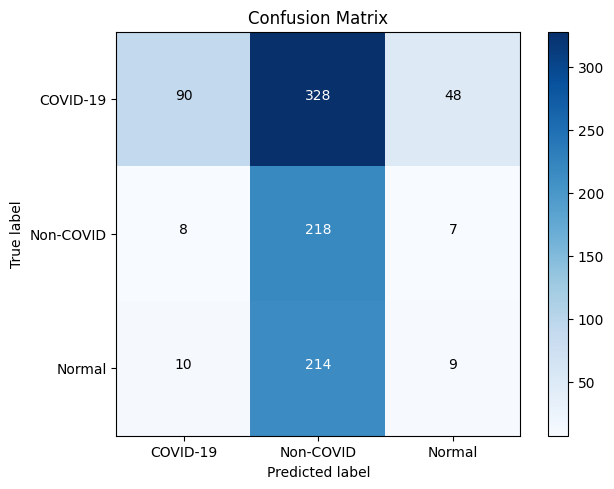

In [ ]:
# Extract images from the validation dataset
images_ds = val_dataset.map(lambda image, label: image)

# Extract labels from the validation dataset and unbatch them
labels_ds = val_dataset.map(lambda image, label: label).unbatch()

# Get the correct labels as a numpy array
correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()

# Make predictions on the validation dataset
pred = model.predict(val_dataset, steps=VALIDATION_STEPS)

# Get the true labels by finding the index of the maximum value
y_true = np.argmax(correct_labels, axis=-1)

# Get the predicted labels by finding the index of the maximum predicted value
y_pred = np.argmax(pred, axis=-1)

# Print a classification report showing precision, recall, and F1-score
print(classification_report(y_true, y_pred, target_names=CLASSES))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
display_confusion_matrix(cm=cm, classes=CLASSES, title='Confusion Matrix')


Test The Model

In [ ]:
dataset = get_test_dataset()
dataset = dataset.unbatch().batch(5)
batch = iter(dataset)

1/1 [==============================] - 0s 451ms/step


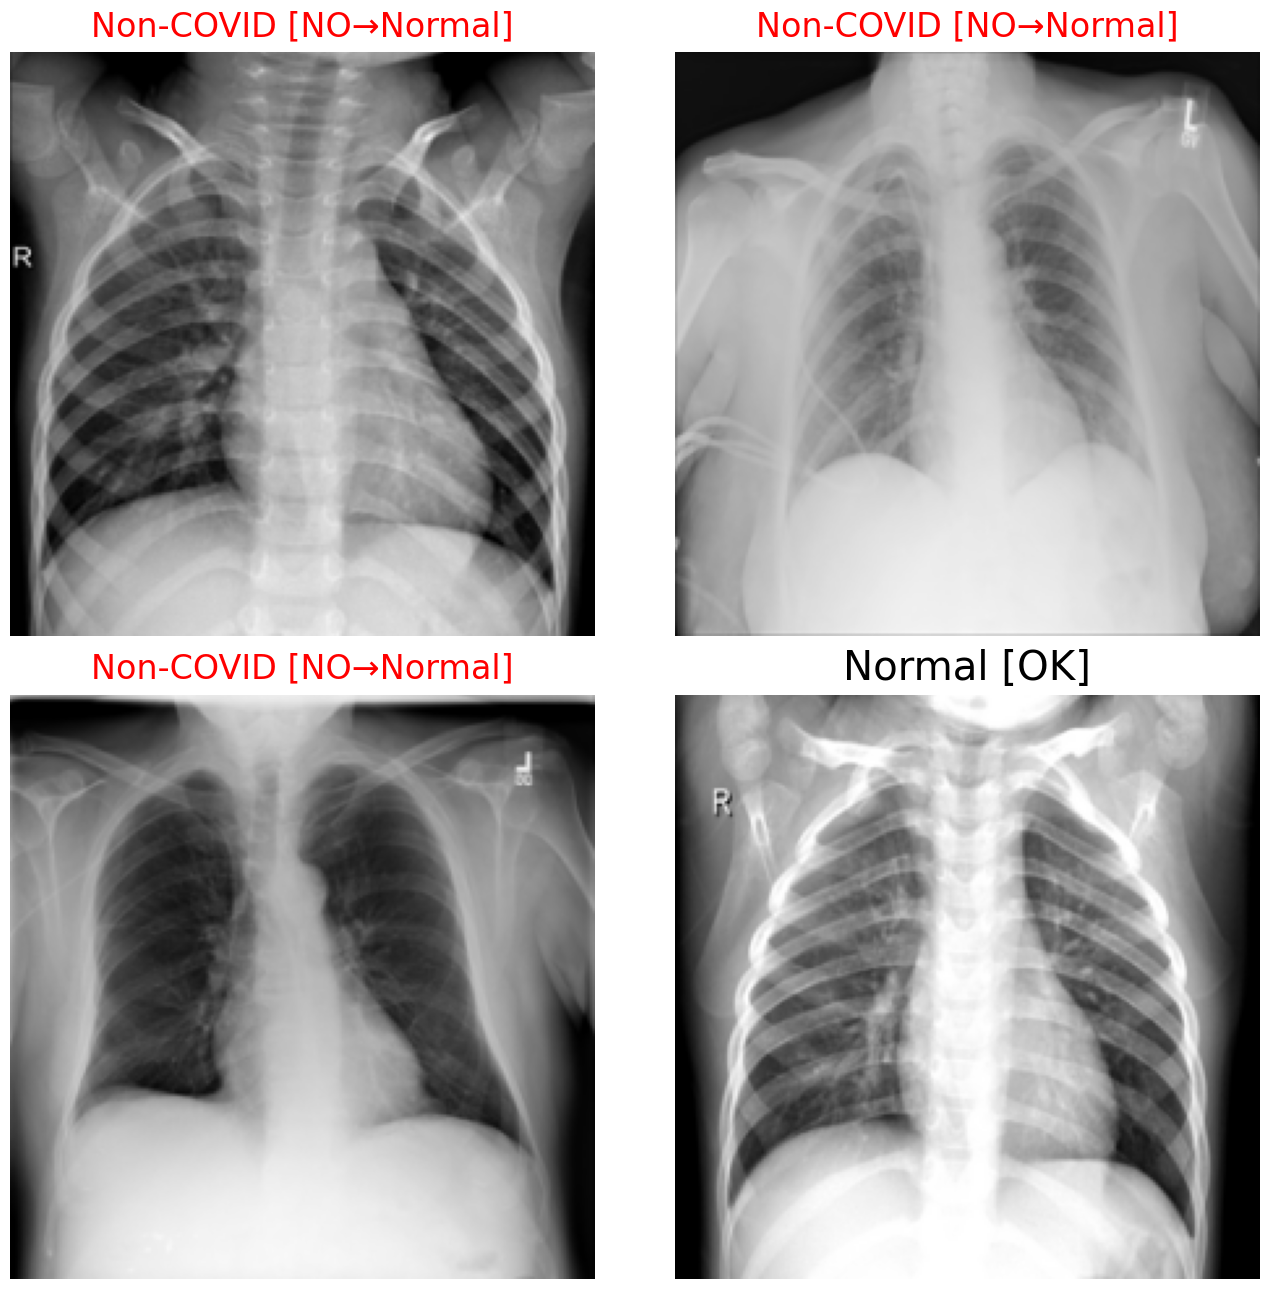

In [ ]:
# run this cell again for next set of images
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch((images, labels), predictions)